In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 95.2 MB/s eta 0:00:00
   ━━━━

In [1]:
#Crear el DataSet
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

#Generar un dataset sintètico de clasificaciòn
#1000 muestras
#10 caracteristicas totales
#5 caracteristicas informativas y 2 redundantes

X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=2,
                           n_clusters_per_class=1,
                           random_state=42)


#Convertir a dataframe de pandas y asignamos nombres a las COL
data = pd.DataFrame(X,columns=[f"feature_{i}" for i in range(10)])
data['target']= y

print(data.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   2.391920   0.443436   1.556545  -0.767381   1.148846   1.492141   
1   1.607854   1.475931   0.446662   0.902533   1.905526  -0.813787   
2  -0.895996   1.659461  -0.688502  -1.359969   1.454482   1.207164   
3   1.587328  -0.047797   1.732550   0.957234   0.839760   1.622668   
4   0.592534   0.436305   0.526122  -0.117240   1.580351  -0.288508   

   feature_6  feature_7  feature_8  feature_9  target  
0   1.611632  -0.834854  -1.688854  -0.077773       0  
1   1.259474   1.435686   1.170518  -1.131406       1  
2   0.060198  -1.951932  -1.829532   1.227800       0  
3  -1.082722  -2.349058  -2.619970  -0.582887       0  
4   1.925246  -0.275455  -0.526378   0.733348       1  


In [3]:
#2. Configuar el experimiento con Pycaret
#Importar la funcion de pycaret
from pycaret.classification import *

#Configurar el experimento:
exp_clf = setup(data=data, #dataframe
                target='target', #variable objetivo
                session_id=123, #semilla
                normalize=True, #normalizaciòn de variables
                transformation=True, #transformaciòn para la distribuciòn
                data_split_shuffle=True,
                verbose=False)

In [4]:
#Comparación del modelo
#Compare Model, para evaluar varios modelos de clasificación de forma automatica:

best_model = compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9929,0.9973,0.9971,0.9888,0.9929,0.9857,0.9858,0.0810
et,Extra Trees Classifier,0.9800,0.9958,0.9686,0.9914,0.9797,0.9600,0.9605,0.2100
xgboost,Extreme Gradient Boosting,0.9800,0.9949,0.9743,0.9861,0.9797,0.9600,0.9608,0.1370
lightgbm,Light Gradient Boosting Machine,0.9771,0.9963,0.9686,0.9856,0.9768,0.9543,0.9548,0.7660
knn,K Neighbors Classifier,0.9743,0.9934,0.9600,0.9885,0.9737,0.9486,0.9495,0.1020
ridge,Ridge Classifier,0.9743,0.9963,0.9600,0.9886,0.9737,0.9486,0.9496,0.0800
ada,Ada Boost Classifier,0.9743,0.9944,0.9686,0.9801,0.9738,0.9486,0.9495,0.1950
lda,Linear Discriminant Analysis,0.9743,0.9958,0.9600,0.9886,0.9737,0.9486,0.9496,0.0800
gbc,Gradient Boosting Classifier,0.9729,0.9963,0.9600,0.9859,0.9722,0.9457,0.9470,0.4810
lr,Logistic Regression,0.9700,0.9960,0.9657,0.9748,0.9699,0.9400,0.9406,0.6590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [5]:
#creamos un modelo rf
rf_model= create_model('rf')
#mostramos un resumen del modelo
print(rf_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.9935,0.9714,0.9189,0.9444,0.8857,0.8872
1,0.9857,1.0000,1.0000,0.9722,0.9859,0.9714,0.9718
2,0.9429,0.9910,0.8857,1.0000,0.9394,0.8857,0.8916
3,0.9714,0.9963,0.9714,0.9714,0.9714,0.9429,0.9429
4,0.9714,0.9780,0.9714,0.9714,0.9714,0.9429,0.9429
5,0.9714,0.9992,0.9429,1.0000,0.9706,0.9429,0.9444
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9714,0.9992,0.9714,0.9714,0.9714,0.9429,0.9429
8,0.9571,1.0000,0.9143,1.0000,0.9552,0.9143,0.9177


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [6]:
#Optimización de hiperparametros

tuned_rf= tune_model(rf_model)

print(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9792,0.9429,0.9167,0.9296,0.8571,0.8575
1,0.9571,1.0000,1.0000,0.9211,0.9589,0.9143,0.9177
2,0.9571,0.9976,0.9429,0.9706,0.9565,0.9143,0.9147
3,0.9857,0.9857,1.0000,0.9722,0.9859,0.9714,0.9718
4,0.9714,0.9837,1.0000,0.9459,0.9722,0.9429,0.9444
5,0.9714,0.9857,0.9429,1.0000,0.9706,0.9429,0.9444
6,0.9571,1.0000,1.0000,0.9211,0.9589,0.9143,0.9177
7,0.9714,0.9833,1.0000,0.9459,0.9722,0.9429,0.9444
8,0.9857,0.9853,0.9714,1.0000,0.9855,0.9714,0.9718


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


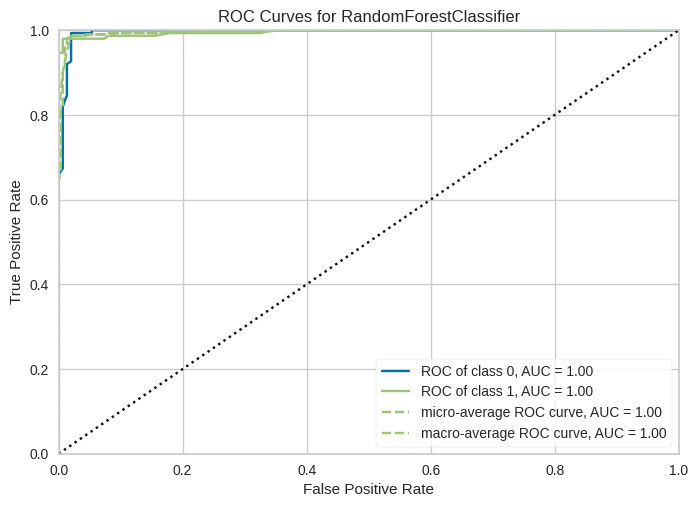

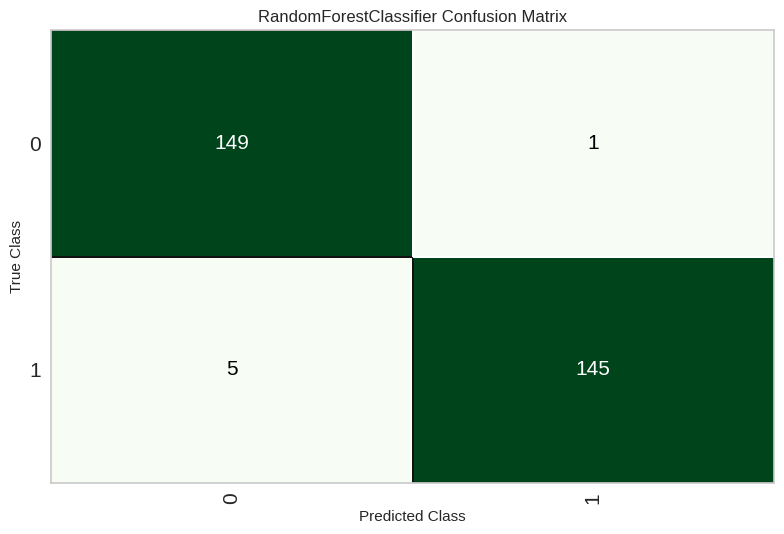

In [7]:
#Revisamos la CURVA ROC
plot_model(tuned_rf,plot='auc')

#matriz de confusion
plot_model(tuned_rf,plot='confusion_matrix')

In [9]:
#Evaluamos el modelo:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
#Finalizando el modelo entrenandolo en todo el dataset
final_rf = finalize_model(tuned_rf)

#Realizar la predicción sobre el mismo dataset
predictions = predict_model(final_rf,data=data)

print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   2.391920   0.443436   1.556545  -0.767381   1.148846   1.492141   
1   1.607854   1.475931   0.446662   0.902533   1.905526  -0.813787   
2  -0.895996   1.659461  -0.688502  -1.359969   1.454482   1.207164   
3   1.587328  -0.047797   1.732550   0.957234   0.839760   1.622668   
4   0.592534   0.436305   0.526122  -0.117240   1.580351  -0.288508   

   feature_6  feature_7  feature_8  feature_9  target  prediction_label  \
0   1.611632  -0.834854  -1.688854  -0.077773       0                 0   
1   1.259474   1.435686   1.170518  -1.131406       1                 1   
2   0.060198  -1.951932  -1.829532   1.227800       0                 0   
3  -1.082722  -2.349058  -2.619970  -0.582887       0                 0   
4   1.925246  -0.275455  -0.526378   0.733348       1                 1   

   prediction_score  
0              0.97  
1              1.00  
2              0.97  
3              1.00  
4           

In [11]:
save_model(final_rf,'final_rf_model')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['feature_0', 'feature_1',
                                              'feature_2', 'feature_3',
                                              'feature_4', 'feature_5',
                                              'feature_6', 'feature_7',
                                              'feature_8', 'feature_9'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strat...
                  RandomFo

In [13]:
loaded_model= load_model('final_rf_model')

Transformation Pipeline and Model Successfully Loaded


In [14]:
prediction_loaded = predict_model(loaded_model,data=data)
print(prediction_loaded.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   2.391920   0.443436   1.556545  -0.767381   1.148846   1.492141   
1   1.607854   1.475931   0.446662   0.902533   1.905526  -0.813787   
2  -0.895996   1.659461  -0.688502  -1.359969   1.454482   1.207164   
3   1.587328  -0.047797   1.732550   0.957234   0.839760   1.622668   
4   0.592534   0.436305   0.526122  -0.117240   1.580351  -0.288508   

   feature_6  feature_7  feature_8  feature_9  target  prediction_label  \
0   1.611632  -0.834854  -1.688854  -0.077773       0                 0   
1   1.259474   1.435686   1.170518  -1.131406       1                 1   
2   0.060198  -1.951932  -1.829532   1.227800       0                 0   
3  -1.082722  -2.349058  -2.619970  -0.582887       0                 0   
4   1.925246  -0.275455  -0.526378   0.733348       1                 1   

   prediction_score  
0              0.97  
1              1.00  
2              0.97  
3              1.00  
4           